# Bangalore traffic prediction and analysis

## *Project Objectives :*

### -To analyze traffic patterns in Bangalore using real-world traffic data.
### -To predict traffic congestion levels (Low / Medium / High) based on demand, capacity, disruptions, and temporal factors
### -To identify and explain the key factors that contribute to traffic congestion

## (A) Data loading :


In [1]:
import pandas as pd
dataset = pd.read_csv('bangalore_traffic_daily.csv')
dataset

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,No
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,No
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,No
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,No


### Dataset description :
#### This dataset contains daily traffic observations from Bangalore, recorded across major roads and intersections between January 2022 and August 2024.
#### Each record represents traffic conditions for a specific road on a given day and includes information related to traffic demand, road capacity, disruptions, environmental conditions, and commuter behavior.

## (B) Data cleaning and validation

In [2]:
dataset.shape


(8936, 16)

In [3]:
dataset.dtypes


Date                                   object
Area Name                              object
Road/Intersection Name                 object
Traffic Volume                          int64
Average Speed                         float64
Travel Time Index                     float64
Congestion Level                      float64
Road Capacity Utilization             float64
Incident Reports                        int64
Environmental Impact                  float64
Public Transport Usage                float64
Traffic Signal Compliance             float64
Parking Usage                         float64
Pedestrian and Cyclist Count            int64
Weather Conditions                     object
Roadwork and Construction Activity     object
dtype: object

#### 1. Converting date feature from obj to datetime type

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.dtypes

Date                                  datetime64[ns]
Area Name                                     object
Road/Intersection Name                        object
Traffic Volume                                 int64
Average Speed                                float64
Travel Time Index                            float64
Congestion Level                             float64
Road Capacity Utilization                    float64
Incident Reports                               int64
Environmental Impact                         float64
Public Transport Usage                       float64
Traffic Signal Compliance                    float64
Parking Usage                                float64
Pedestrian and Cyclist Count                   int64
Weather Conditions                            object
Roadwork and Construction Activity            object
dtype: object

#### 2. Checking for inacurate ranges of date :

In [5]:
dataset['Date'].describe()

count                             8936
mean     2023-04-22 05:25:11.548791552
min                2022-01-01 00:00:00
25%                2022-08-26 00:00:00
50%                2023-04-24 00:00:00
75%                2023-12-17 06:00:00
max                2024-08-09 00:00:00
Name: Date, dtype: object

#### 3. Checking for exactly duplicate rows :

In [6]:
dataset.duplicated().sum()


np.int64(0)

#### 4. Checked for missing values in all columns

In [7]:
dataset.isna().sum()


Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

#### 5. Checking duplicate entries for same roads on same day :

In [8]:
dataset.duplicated(subset=['Date', 'Road/Intersection Name']).sum()


np.int64(0)

#### 6. Checking unique values for object type features :

In [9]:
dataset.select_dtypes(include='object').nunique()


Area Name                              8
Road/Intersection Name                16
Weather Conditions                     5
Roadwork and Construction Activity     2
dtype: int64

#### 7. Checking for unusual values of parameters : 

In [10]:
(dataset['Traffic Volume'] > 100000).sum()


np.int64(0)

In [11]:
(dataset['Road Capacity Utilization'] > 100).sum()


np.int64(0)

In [12]:
(dataset['Average Speed'] > 120).sum()

np.int64(0)

#### 8. Checking for negative values in numeric type parameters :

In [13]:
(dataset.select_dtypes(include='number') < 0).sum()


Traffic Volume                  0
Average Speed                   0
Travel Time Index               0
Congestion Level                0
Road Capacity Utilization       0
Incident Reports                0
Environmental Impact            0
Public Transport Usage          0
Traffic Signal Compliance       0
Parking Usage                   0
Pedestrian and Cyclist Count    0
dtype: int64

#### 9. Standardizing categorical text :

In [14]:
cat_cols = dataset.select_dtypes(include='object').columns
# Stripping trailing and leading whitespaces
dataset[cat_cols] = dataset[cat_cols].apply(lambda col: col.str.strip())

# Lower casing every object type value
dataset[cat_cols] = dataset[cat_cols].apply(lambda col: col.str.lower())

dataset[cat_cols]

,Area Name,Road/Intersection Name,Weather Conditions,Roadwork and Construction Activity
0,indiranagar,100 feet road,clear,no
1,indiranagar,cmh road,clear,no
2,whitefield,marathahalli bridge,clear,no
3,koramangala,sony world junction,clear,no
4,koramangala,sarjapur road,clear,no
...,...,...,...,...
8931,electronic city,hosur road,fog,no
8932,m.g. road,trinity circle,clear,no
8933,m.g. road,anil kumble circle,clear,no
8934,jayanagar,south end circle,clear,no


## (C) Feature engineering 

#### 1. Extracting day of week using dates :

In [15]:
dataset['day_of_week'] = dataset['Date'].dt.dayofweek
dataset['day_of_week']
# 0-6 : Monday-Sunday


0       5
1       5
2       5
3       5
4       5
       ..
8931    4
8932    4
8933    4
8934    4
8935    4
Name: day_of_week, Length: 8936, dtype: int32

#### 2. Creating binary flag for weekday/weekend  :

In [16]:
dataset['is_weekend'] = dataset['day_of_week'].isin([5, 6]).astype(int)
dataset['is_weekend']


0       1
1       1
2       1
3       1
4       1
       ..
8931    0
8932    0
8933    0
8934    0
8935    0
Name: is_weekend, Length: 8936, dtype: int64

#### 3. Creating binary flag for incidents :

In [17]:
dataset['has_incident'] = (dataset['Incident Reports'] > 0).astype(int)
dataset['has_incident']


0       0
1       1
2       0
3       1
4       1
       ..
8931    1
8932    1
8933    1
8934    1
8935    1
Name: has_incident, Length: 8936, dtype: int64

#### 4. Creating binary flag for roadwork :

In [18]:
dataset['has_roadwork'] = dataset['Roadwork and Construction Activity'].map({'yes':1, 'no':0})
dataset['has_roadwork']

0       0
1       0
2       0
3       0
4       0
       ..
8931    0
8932    0
8933    0
8934    0
8935    0
Name: has_roadwork, Length: 8936, dtype: int64

#### 5. Creating feature for prominent festivals of the city ( Dates within dataset range for festivals like Diwali, Dushehra, Ganesh Chaturthi, Ugadi, etc.) :

In [19]:
dataset['is_festival'] = 0
# Dates within dataset range for festivals like Diwali, Dushehra, Ganesh Chaturthi, Ugadi, etc.
dates = [
    '2022-01-26', '2022-04-02', '2022-05-01', '2022-05-03',
    '2022-07-10', '2022-08-15', '2022-08-31', '2022-10-05',
    '2022-10-24', '2022-12-25',
    '2023-01-26', '2023-03-22', '2023-04-22', '2023-05-01',
    '2023-06-29', '2023-08-15', '2023-09-19', '2023-10-24',
    '2023-11-12', '2023-12-25',
    '2024-01-26', '2024-04-09', '2024-04-11', '2024-05-01',
    '2024-06-17'
]
dates = pd.to_datetime(dates)
dataset.loc[dataset['Date'].isin(dates),'is_festival']=1



#### 6. Creating binary flag for holidays :

In [20]:
dataset['is_holiday'] = ((dataset['is_weekend'] == 1) |
                         (dataset['is_festival']==1) 
                        ).astype(int)

#### 7. Reducing number of categories from weather feature :

In [23]:
dataset['Weather Conditions'].unique()

array(['clear', 'overcast', 'fog', 'rain', 'windy'], dtype=object)

In [24]:
weather_map = {
    'clear': 'clear',
    'overcast': 'clear',
    'windy': 'clear',
    'rain': 'rain',
    'fog': 'fog'
}

dataset['weather_group'] = dataset['Weather Conditions'].map(weather_map)
dataset['weather_group'].unique()


array(['clear', 'fog', 'rain'], dtype=object)

## (D) Target definition

### 1. Obtaining statistical and histogram data for target :

In [26]:
dataset['Congestion Level'].describe()

count    8936.000000
mean       80.818041
std        23.533182
min         5.160279
25%        64.292905
50%        92.389018
75%       100.000000
max       100.000000
Name: Congestion Level, dtype: float64

<Axes: >

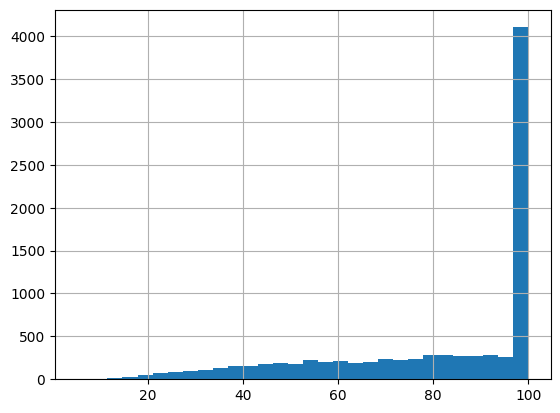

In [27]:
dataset['Congestion Level'].hist(bins=30)

### Target Analysis: Above histogram shows that the congestion level distribution is highly skewed, with a large concentration of values near the upper bound (around 100). This indicates that high congestion conditions dominate the dataset, motivating the use of categorical congestion levels to focus on traffic states rather than precise numeric values. Thus : 

#### **Target Choice :** Multiclass classification
#### **Reason :** Traffic congestion exhibits class and threshhold behavior. Class outputs                 helps in making definite decision making.
#### **Goal :** Predict operational traffic state (High/Med/Low), not numeric values.

###
### 2. Creating bins as High/Med/Low for congestion levels.

In [28]:
low_thresh = 60 
high_thresh = 90

def create_bins(x):
    if x < 60 :
        return 0 # Low level bin
    elif x < 90 :
        return 1 # Med level bin
    else :
        return 2 # High level bin

dataset['Congestion Bin'] = dataset['Congestion Level'].apply(create_bins)

dataset['Congestion Bin']
        

0       2
1       2
2       0
3       2
4       2
       ..
8931    0
8932    2
8933    2
8934    1
8935    0
Name: Congestion Bin, Length: 8936, dtype: int64

#### **Reason of selected bin limits :**
#### - Congestion data shows high frequency of data at higher congestion levels( 80 - 100 )
#### - This resembles real urban traffic 


###
### 3. Sanity check for expected class size of each bin :

In [29]:
dataset['Congestion Bin'].value_counts(normalize=True)

Congestion Bin
2    0.523165
1    0.258953
0    0.217883
Name: proportion, dtype: float64

## (E) Feature - Target sanity validation

#### **Objective:** 
#### To verify whether engineered categorical features exhibit logical and consistent relationships with the target variable (Congestion Bin) after binning the continuous congestion score.
#### The analysis uses row-normalized contingency tables to compare conditional congestion distributions across feature categories.

In [30]:
pd.crosstab(
    dataset['day_of_week'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
day_of_week,,,
0,0.206019,0.269290,0.524691
1,0.224599,0.268144,0.507257
2,0.206951,0.257504,0.535545
3,0.217600,0.244800,0.537600
4,0.234637,0.255387,0.509976
5,0.219380,0.270543,0.510078
6,0.216195,0.246069,0.537736


### 1. Weekend vs Congestion 

In [31]:
pd.crosstab(
    dataset['is_weekend'],
    dataset['Congestion Bin'],
    normalize = 'index'
)
    

Congestion Bin,0,1,2
is_weekend,,,
0,0.217917,0.259178,0.522906
1,0.217799,0.258392,0.523810


### 2. Roadwork vs Congestion

In [32]:
pd.crosstab(
    dataset['has_roadwork'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
has_roadwork,,,
0,0.216290,0.261857,0.521852
1,0.232426,0.232426,0.535147


### 3. Festival vs Congestion 

In [33]:
pd.crosstab(
    dataset['is_festival'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
is_festival,,,
0,0.217476,0.258468,0.524056
1,0.233480,0.277533,0.488987


### 4. Weather vs Congestion

In [34]:
pd.crosstab(
    dataset['weather_group'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
weather_group,,,
clear,0.217622,0.261818,0.520559
fog,0.205422,0.258603,0.535975
rain,0.234583,0.234583,0.530834


### 5. Incident vs Congestion

In [35]:
pd.crosstab(
    dataset['has_incident'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
has_incident,,,
0,0.473947,0.248854,0.277199
1,0.123910,0.262659,0.613431


### **Conclusion :** 
#### - The target binning preserves logical and consistent feature–target relationships.
#### - Traffic incidents show the strongest impact, with a clear shift toward high congestion → best predictive feature.
#### - Roadwork, weather, and festivals have moderate impact and act as contextual amplifiers.
#### - Day of week and weekend have weak influence and mainly provide background temporal context.
#### - No feature exhibits contradictory behavior, confirming target sanitation quality.
####
        

## (F) Feature selection :


### **Objective**
#### Select features that explain congestion using **observable traffic and contextual signals**, while **excluding labeled variables and high-cardinality identifiers (road and area names)** to prevent memorization and promote generalizable, data-driven learning.
###

In [36]:
dataset.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity', 'day_of_week', 'is_weekend',
       'has_incident', 'has_roadwork', 'is_festival', 'is_holiday',
       'weather_group', 'Congestion Bin'],
      dtype='object')

### 1. Dropping columns with labeled categories :

In [37]:
drop_columns = ['Date',
    'Area Name',
    'Road/Intersection Name',
    'Congestion Level', 'Weather Conditions', 'Roadwork and Construction Activity']

### 2. Target feature with Y table :

In [38]:
x = dataset.drop( columns = drop_columns + ['Congestion Bin'] )
y = dataset['Congestion Bin']

In [39]:
x.shape, y.shape

((8936, 17), (8936,))